In [45]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [46]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()


In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

In [49]:
# generators - create batch
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', # Changed directory to point to extracted files
    labels = 'inferred',
    batch_size = 32, # Added batch_size parameter
    image_size =(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', # Changed directory to point to extracted files
    labels = 'inferred',
    batch_size = 32, # Added batch_size parameter
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [50]:
#normalize
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [51]:
#creating CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding = 'valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3),padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))
model.add(Conv2D(32, kernel_size=(3,3),padding = 'valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                      

In [53]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 55s 83ms/step - loss: 0.7006 - accuracy: 0.6479 - val_loss: 0.5951 - val_accuracy: 0.6860
Epoch 2/10
625/625 [==============================] - 52s 83ms/step - loss: 0.5180 - accuracy: 0.7405 - val_loss: 0.5416 - val_accuracy: 0.7460
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4378 - accuracy: 0.7947 - val_loss: 0.4960 - val_accuracy: 0.7700
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3664 - accuracy: 0.8347 - val_loss: 0.4585 - val_accuracy: 0.7942
Epoch 5/10
625/625 [==============================] - 55s 87ms/step - loss: 0.2931 - accuracy: 0.8749 - val_loss: 0.5668 - val_accuracy: 0.7774
Epoch 6/10
625/625 [==============================] - 53s 85ms/step - loss: 0.2023 - accuracy: 0.9176 - val_loss: 0.6128 - val_accuracy: 0.7412
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.1358 - accuracy: 0.9489 - val_loss: 0.8409 - val_accuracy:

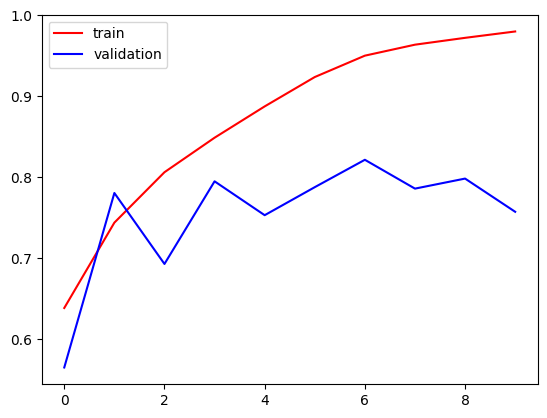

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

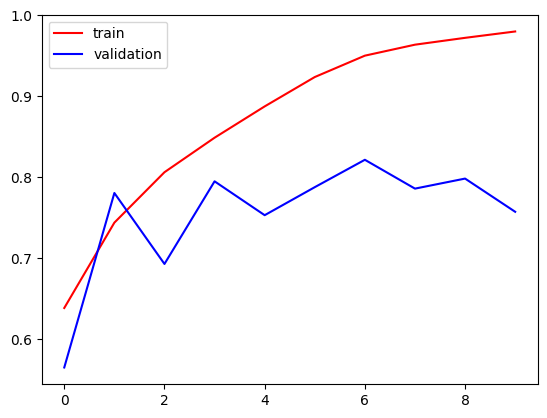

In [32]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

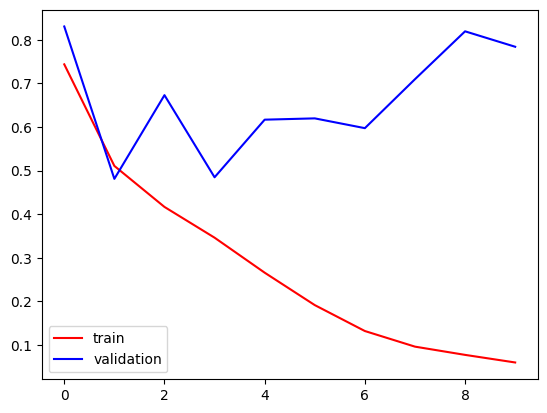

In [33]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()


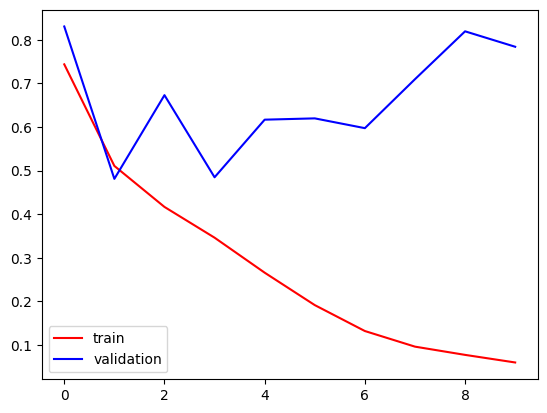

In [34]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [35]:
#need to reduce complexity

#add more data
#reducing complexity

In [36]:
import cv2


In [37]:
test_image = cv2.imread('/content/cat.jpg')

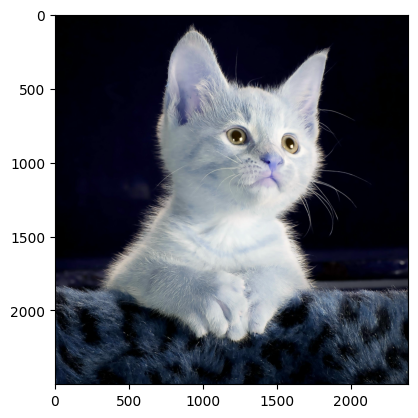

In [38]:
plt.imshow(test_image)

In [39]:
test_image.shape

(2500, 2392, 3)

In [40]:
test_image = cv2.resize(test_image, (256,256))

In [41]:
test_image = test_image.reshape((1,256,256,3))

In [44]:
model.predict(test_image)

1/1 [==============================] - 1s 563ms/step


array([[0.]], dtype=float32)